# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

del training_file, testing_file

print (X_train.shape)
print (X_test.shape)


(39209, 32, 32, 3)
(12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print (X_train.shape)
print (X_validation.shape)
print (y_train.shape)
print (y_validation.shape)

(31367, 32, 32, 3)
(7842, 32, 32, 3)
(31367,)
(7842,)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

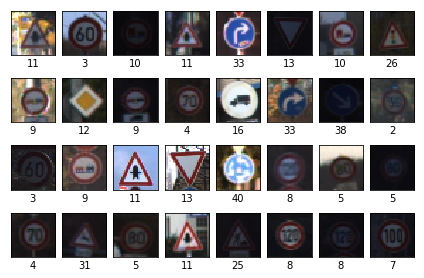

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

x = random.sample(range(1, len(X_train)), 32)
fig = plt.figure()
axes = []
for i in range(0, len(x)):
    axis = fig.add_subplot(4,8,i+1)
    axis.set_xlabel(y_train[x[i]])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    axis.imshow(X_train[x[i]])
plt.tight_layout(h_pad=0.5, w_pad=0)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
#import cv2
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_test = X_test.astype('float32')

def normalize(image):
    return (image/128 - 1)

In [7]:
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

In [8]:
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_train = normalize(X_train)
X_validation = np.sum(X_validation/3, axis=3, keepdims=True)
X_validation = normalize(X_validation)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I decided to normalize the image pixel values, because it ensures numerical stability. I also converted the images to grayscale because I don't think color is a very important indicator.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used sklearn's train_test_split to split the training and validation sets in an 80-20 ratio. I also one-hot-encoded the labels.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

from tensorflow.contrib.layers import flatten
rate = 0.001

mu = 0
sigma = 0.05

keep_prob = tf.constant(0.4)

one_hot_y = tf.one_hot(y, 43)


In [11]:
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5,5,1,32), mean = mu, stddev = sigma), name='wc1'),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5,5,32,64), mean = mu, stddev = sigma), name='wc2'),
    'wc3': tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean = mu, stddev = sigma), name='wc3'),
    'wc4': tf.Variable(tf.truncated_normal(shape=(3,3,128,256), mean = mu, stddev = sigma), name='wc4'),
    'wd1': tf.Variable(tf.truncated_normal(shape=(49*256, 256), mean = mu, stddev = sigma), name='wd1'),
    'wd2': tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma), name='wd2'),
    'wd3': tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma), name='wd3')
}

biases = {
    'bc1': tf.Variable(tf.zeros(32), name='bc1'),
    'bc2': tf.Variable(tf.zeros(64), name='bc2'),
    'bc3': tf.Variable(tf.zeros(128), name='bc3'),
    'bc4': tf.Variable(tf.zeros(256), name='bc4'),
    'bd1': tf.Variable(tf.zeros(256), name='bd1'),
    'bd2': tf.Variable(tf.zeros(128), name='bd2'),
    'bd3': tf.Variable(tf.zeros(43), name='bd3')
}


In [12]:

def LeNet(x):
    
    # First convolution. Input: 32x32x3, output: 28x28x32
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides = [1,1,1,1], padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    conv1 = tf.nn.relu(conv1)
    print (conv1)

    # Second convolution. Input 28x28x256, output: 14x14x64
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides = [1,1,1,1], padding = 'SAME')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print (conv2)
    
    # Third convolution. Input: 14x14x128, output: 14x14x128
    conv3 = tf.nn.conv2d(conv2, weights['wc3'], strides = [1,1,1,1], padding = 'SAME')
    conv3 = tf.nn.bias_add(conv3, biases['bc3'])
    conv3 = tf.nn.relu(conv3)
    print (conv3)
    
    # Fourth convolution. Input: 14x14x64, output: 7x7x256
    conv4 = tf.nn.conv2d(conv3, weights['wc4'], strides = [1,1,1,1], padding = 'SAME')
    conv4 = tf.nn.bias_add(conv4, biases['bc4'])
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    print (conv4)
    
    flat = flatten(conv4)
    print (flat)
    
    fcc1 = tf.add(tf.matmul(flat, weights['wd1']), biases['bd1'])
    fcc1 = tf.nn.relu(fcc1)
    
    fcc2 = tf.add(tf.matmul(fcc1, weights['wd2']), biases['bd2'])
    fcc2 = tf.nn.relu(fcc2)
    
    logits = tf.add(tf.matmul(fcc2, weights['wd3']), biases['bd3'])
    fcc2 = tf.nn.dropout(fcc2, keep_prob)
    
    return logits


In [13]:
logits = LeNet(x)

# Training functions - cost and optimization
loss_operation = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Evaluation functions, use logits to produce results.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_2:0", shape=(?, 14, 14, 128), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 256), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 12544), dtype=float32)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture has:
- 4 consecutive convolution layers, each having a Relu at the end, and a Max-pooling function after every 2.
My convolution layers have filter lengths of 32,64,128,256. This is so that the ConvNet learns to build on top of previously learned patterns.
- 3 fully connected layers, each having a Relu after it
- Dropout at the end to prevent overfitting

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 15
BATCH_SIZE = 256

save_file = 'lenet.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.921

EPOCH 2 ...
Validation Accuracy = 0.965

EPOCH 3 ...
Validation Accuracy = 0.982

EPOCH 4 ...
Validation Accuracy = 0.987

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.984

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.990

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.992

EPOCH 11 ...
Validation Accuracy = 0.992

EPOCH 12 ...
Validation Accuracy = 0.984

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.992

EPOCH 15 ...
Validation Accuracy = 0.994

Model saved


In [15]:
# Evaluating Model on Test data!

X_test = np.sum(X_test/3, axis=3, keepdims=True)
X_test = normalize(X_test)

with tf.Session() as sess:
    saver2 = tf.train.import_meta_graph('lenet.ckpt.meta')
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    print ('Saver restored')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Saver restored
Test Accuracy = 0.952


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- *Optimizer*: AdamOptimizer
- *Batch size*: 256
- *Epochs*: 15
- *Hyperparameters:* 
I used a learning rate of 0.001, and a constant drop probability (for dropout) of 40%.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I have to say thia project involved more trial and error than I've ever done in my life, which is why I am submitting so late. I kept noting down the combinations of settings I used periodically, and it ran into at least over 50 fine-tunings.

I started out with a simple LeNet architecture, and it gave me a pretty decent validation accuracy of 96.6%. Then after adding a few more layers, the accuracy increased to over 98%, so I chose the newer architecture.

I played with epochs but to be honest I didn't use more than 15 epochs in total, to make sure that my model doesn't consume too much money on AWS. In the end 15 epochs gives me 99.4% accuracy!

I also tried different preprocessing for my data - with grayscale, without grayscale, normalized, un-normalized etc. I stuck with grayscale normalized because again, efficiency! In terms of accuracy, not a huge difference.

One major thing I noticed was the dimensions of each convolution layer. I first started with a bigger filter widths, gradually becoming smaller. Then I tried the opposite, because I had a stupid idea. Finally I came back to the big -> small filter widths, and this entire process taught me a lot about convolutional neural networks.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The model has two major vulnerabilities:
- Rotation of signs
- Glare on the signboard.

For example as seen below, image3 gets incorrectly identified because the sign is rotated. It could have been solved by generating additional data.

Image 4 has a yellow color and a shine and shadow on it, which interferes with the model. I believe grayscale has caused this issue, and a different color channel selection could have done better.

Surprisingly, the last one with snow on it was identified correctly!

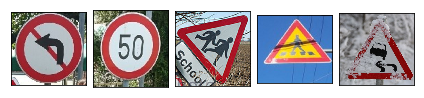

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import cv2
from PIL import Image

fig1 = plt.figure()

axis1 = fig1.add_subplot(1,5,1)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis1.imshow(mpimg.imread('images/sign1.png'))

axis2 = fig1.add_subplot(1,5,2)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis2.imshow(mpimg.imread('images/sign2.PNG'))

axis3 = fig1.add_subplot(1,5,3)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis3.imshow(mpimg.imread('images/sign3.PNG'))

axis4 = fig1.add_subplot(1,5,4)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis4.imshow(mpimg.imread('images/sign4.PNG'))

axis5 = fig1.add_subplot(1,5,5)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
axis5.imshow(mpimg.imread('images/sign5.PNG'))

plt.tight_layout(h_pad=0.5, w_pad=0)

def normalize(image):
    return (image/128 - 1)

images = ['sign1.png', 'sign2.PNG', 'sign3.PNG', 'sign4.PNG', 'sign5.PNG']
images2 = []

In [23]:
for image in images:
    image2 = mpimg.imread('images/' + image)
    image2 = image2.astype('float32')
    image2 = image2[:,:,:-1]
    image2 = cv2.resize(image2,(32,32))
    image2 = np.sum(image2/3, axis=2, keepdims=True)
    images2.append(image2)

print ('Images resized, grayscaled and normalized.')


Images resized, grayscaled and normalized.


In [116]:
#Testing image manipulation functions
#img = np.sum((mpimg.imread('images/sign1.png')[:,:,:-1])/3, axis=3, keepdims=True)

img = mpimg.imread('images/sign1.png')
print (img.shape)

img = img[:,:,:-1]
print (img.shape)

img = np.sum(img/3, axis=2, keepdims=True)
print (img.shape)

(345, 354, 4)
(345, 354, 3)
(345, 354, 1)


In [25]:
images2 = np.array(images2)

with tf.Session() as sess:
    saver2 = tf.train.import_meta_graph('lenet.ckpt.meta')
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    prediction = tf.argmax(logits, 1)
    result = sess.run(prediction, feed_dict={x: images2})


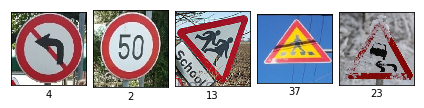

In [27]:
fig = plt.figure()
for i in range(0, 5):
    axis = fig.add_subplot(1,5,i+1)
    axis.set_xlabel(result[i])
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    axis.imshow(mpimg.imread('images/' + images[i]))
plt.tight_layout(h_pad=0.5, w_pad=0)

### Well the results are here:

1. Image 1: Wrong
2. Image 2: Correct
3. Image 3: Wrong
4. Image 4: Wrong
5. Image 5: Correct

Accuracy: 40%

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

NOPE!!! I only got an accuracy of 40%, checked manually. :(

In [46]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver2 = tf.train.import_meta_graph('lenet.ckpt.meta')
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    probabilities = sess.run(softmax, feed_dict={x: images2})
    result2 = sess.run(tf.nn.top_k(probabilities, k=5))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Please see implementation below.

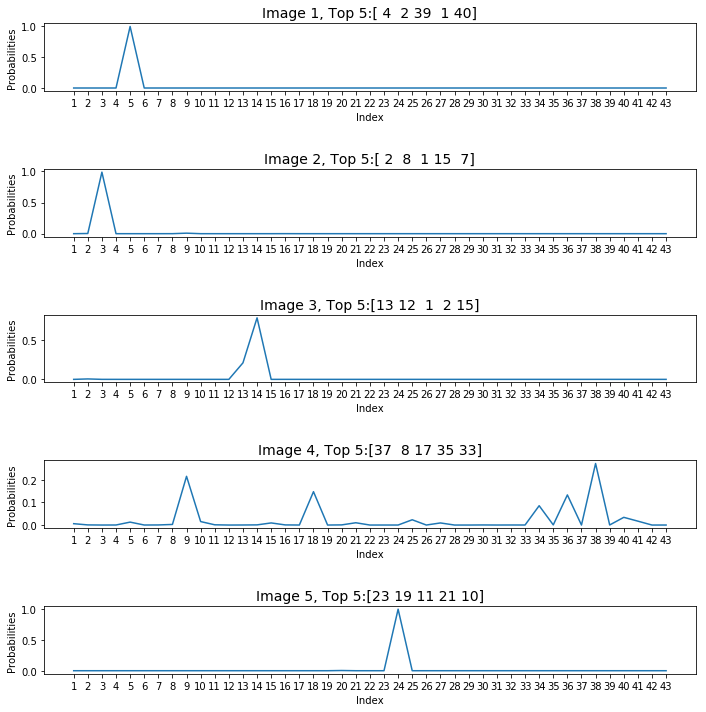

In [54]:
#print (result2.values[0])

figure = plt.figure(figsize=(10,10))
for i in range(0,5):
    axis = figure.add_subplot(5,1,i+1)
    axis.set_xlabel('Index')
    axis.set_ylabel('Probabilities')
    axis.set_title('Image ' + str(i+1) + ', Top 5:' + str(result2.indices[i]) , fontsize=14)
    plt.xticks(range(1,44))
    axis.plot(range(1,44),probabilities[i])

plt.tight_layout(h_pad=3, w_pad=0)

The model seems to be very certain about all the images except Image 4, which has several peaks. Here is the image:

Here is the tricky image confusing my model. :)


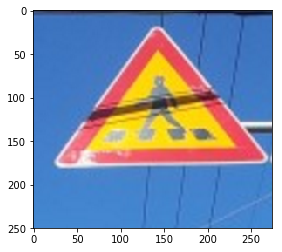

In [56]:
plt.imshow(mpimg.imread('images/sign4.PNG'))
print ('Here is the tricky image confusing my model. :)')

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.